In [3]:
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt

In [4]:
# collecting 12 months data and store in a single file.

In [5]:
salesfiles = os.listdir("D:/Sales_Data")
data = pd.DataFrame()
for sfiles in salesfiles:
    fd = pd.read_csv("D:/Sales_Data/" + sfiles)
    data = pd.concat([data,fd])
data.to_csv("D:/Sales_Data/alldata.csv", index=False)

In [6]:
#Data cleaing

In [7]:
alldata = pd.read_csv("D:/Sales_Data/alldata.csv")
alldata = alldata.dropna(how="any")
alldata = alldata.reset_index(drop=True)
alldata.drop(alldata.index[alldata['Price Each'] == 'Price Each'], inplace = True)
alldata = alldata.reset_index(drop=True)

In [ ]:
# Montly sale report

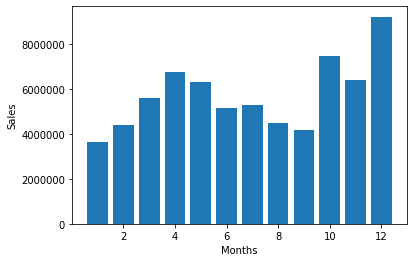

In [8]:
alldata['sales'] = pd.to_numeric(alldata['Quantity Ordered']) * pd.to_numeric(alldata['Price Each'])
alldata['salesmonth'] = alldata['Order Date'].str[0:2]
alldata['salesmonth'] = pd.to_numeric(alldata['salesmonth'])
result = alldata.groupby('salesmonth').sum()
result.head(12)

months = range(1,13)
plt.bar(months,result['sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.savefig("D:/Sales_Data/myplot.pdf")
plt.show()

In [9]:
#City having Maximum sell

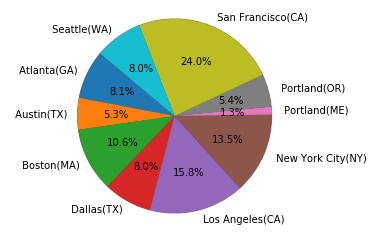

In [10]:
alldata['sales'] = pd.to_numeric(alldata['Price Each']) * pd.to_numeric(alldata['Quantity Ordered'])
def getcity(x):
    return x.split(',')[1]
def getstate(x):
    return x.split(',')[2].split(' ')[1]

alldata['cities'] = alldata['Purchase Address'].apply(lambda x: f"{getcity(x)}({getstate(x)})")
result=alldata.groupby('cities').sum()
cities = [city for city, data in alldata.groupby('cities') ]

explodes = [0.1]
i=1
while i < len(cities):
    explodes.append(0)
    i+=1
plt.pie(result['sales'], explode = explodes, labels=cities, autopct='%1.1f%%', shadow=True, startangle=140,radius= 1800)
plt.axis('equal')
plt.show()

In [4]:
#When to show(hourly) the advertisement to maximize the product sale:

In [11]:
alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])

Text(0, 0.5, 'No of orders')

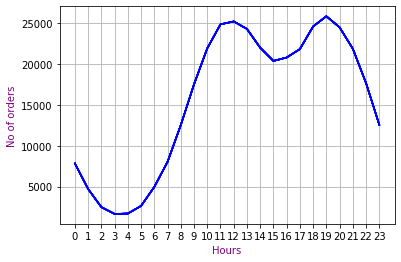

In [12]:
alldata['hour'] = alldata['Order Date'].dt.hour
alldata['minute'] = alldata['Order Date'].dt.minute
hours = [hour for hour, data in alldata.groupby('hour') ]
plt.plot(hours, alldata.groupby('hour').count(),color='blue' )
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours', color='purple')
plt.ylabel('No of orders', color='purple')

In [13]:
#get the list of products selling together

In [14]:
newdf = alldata[alldata['Order ID'].duplicated(keep=False)]
newdf['grouped'] = newdf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
newdf = newdf[['Order ID', 'grouped']].drop_duplicates()

In [15]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in newdf['grouped']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list,2)))
    count.update(Counter(combinations(row_list,3)))
    
for key,value in count.most_common(10):
    print(key,value)

('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable') 1021
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1020
('iPhone', 'Lightning Charging Cable', 'iPhone') 1019
('iPhone', 'iPhone', 'Lightning Charging Cable') 1007
('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable') 1003
('Google Phone', 'USB-C Charging Cable', 'Google Phone') 999
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 997
('Google Phone', 'Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones', 'iPhone') 462
('Wired Headphones', 'iPhone', 'Wired Headphones') 462


In [17]:
#what product sold the most and the reason
# product sell report.

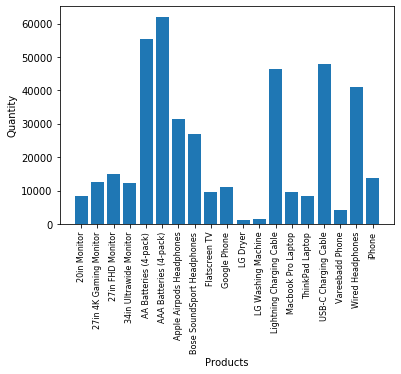

In [18]:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])
quantity = alldata.groupby('Product').sum()
products = [product for product, data in alldata.groupby('Product')]
plt.bar(products, quantity['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [19]:
# product sell report and comparison based on price

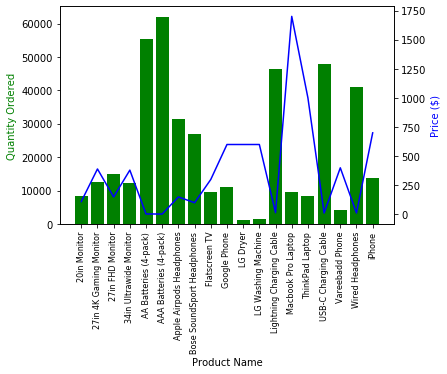

In [20]:
alldata['Price Each'] = pd.to_numeric(alldata['Price Each'])
prices = alldata.groupby('Product').mean()['Price Each']

fig, ax1 =plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity['Quantity Ordered'],color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()